In [6]:
import pandas as pd
import numpy as np
import os

In [13]:
def load_dataset(filename):
    with open(filename) as file:
        lines = [x.strip() for x in file.readlines()]
    
    words = []
    labels = []
    
    total = 0
    for l in lines:

        if l == "":
            total += 1
            continue
        else:
            words += [l.split(" _ _ ")[0]]
            labels += [l.split(" _ _ ")[1]]
    
    total+=1
    label_set = list(set(labels))
    label_types = [x.split('-')[1] for x in labels if len(x) > 1]
    
    print(filename)
    print('total:', total)
    print('label set:', label_set)
    print('label types:', set(label_types))
    print('label distribution:')
    for l in sorted(label_set):
        if l != 'X':
            print(l, ":",  "%.2f" % (labels.count(l)/ len(labels) * 100), "%")
            
    print('label types distribution:')
    for l in set(label_types):
        print(l, ":", "%.2f" % (label_types.count(l) / len(labels) * 100), "%")
    return words, labels, label_set

    

In [14]:
dev_words, dev_labels, dev_label_set = load_dataset('dev.txt')

dev.txt
total: 800
label set: ['B-CW', 'I-PROD', 'B-CORP', 'O', 'I-LOC', 'I-CW', 'B-LOC', 'I-GRP', 'B-GRP', 'B-PER', 'I-PER', 'I-CORP', 'B-PROD']
label types: {'GRP', 'PER', 'LOC', 'PROD', 'CW', 'CORP'}
label distribution:
B-CORP : 1.23 %
B-CW : 1.16 %
B-GRP : 1.14 %
B-LOC : 0.98 %
B-PER : 1.39 %
B-PROD : 1.84 %
I-CORP : 1.18 %
I-CW : 1.56 %
I-GRP : 2.19 %
I-LOC : 0.59 %
I-PER : 1.74 %
I-PROD : 1.25 %
O : 83.75 %
label types distribution:
GRP : 3.33 %
PER : 3.14 %
LOC : 1.57 %
PROD : 3.09 %
CW : 2.72 %
CORP : 2.41 %


In [15]:
train_words, train_labels, train_label_set = load_dataset('train.txt')

train.txt
total: 15300
label set: ['B-CW', 'B-CORP', 'I-PROD', 'O', 'I-CW', 'I-CORP', 'B-LOC', 'I-GRP', 'B-GRP', 'B-PER', 'I-PER', 'I-LOC', 'B-PROD']
label types: {'GRP', 'PER', 'LOC', 'PROD', 'CW', 'CORP'}
label distribution:
B-CORP : 1.35 %
B-CW : 1.12 %
B-GRP : 1.25 %
B-LOC : 1.23 %
B-PER : 1.36 %
B-PROD : 1.66 %
I-CORP : 1.41 %
I-CW : 1.48 %
I-GRP : 2.21 %
I-LOC : 0.76 %
I-PER : 1.63 %
I-PROD : 1.02 %
O : 83.51 %
label types distribution:
GRP : 3.47 %
PER : 2.99 %
LOC : 1.98 %
PROD : 2.68 %
CW : 2.61 %
CORP : 2.76 %


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns


def plot_all_labels(label_set, all_labels):

    index_to_labels = {}
    for i in range(len(label_set)):
        index_to_labels[i] = label_set[i]

    print(index_to_labels)

    label_to_index = {}
    for key in index_to_labels:
        label_to_index[index_to_labels[key]] = key
    print(label_to_index)

    arr = np.zeros(len(label_set))
    label_counts = Counter(all_labels)
    for key, value in label_counts.items():
        arr[label_to_index[key]] = value


    plt.figure(figsize=(30,5))
    ax = sns.barplot(x=np.arange(len(label_set)),y=arr)
    ax.set_xticklabels(list(index_to_labels.values()), fontsize=15, rotation=40, ha="right")
    ax.set(xlabel='Classes', ylabel='Class Counts')
    plt.show()

In [17]:


def plot_only_ne(label_set, all_labels):

    index_to_labels = {}
    i=0
    for x in label_set:
        if x == 'O':
            continue
        index_to_labels[i] = x
        i += 1

    print(index_to_labels)

    label_to_index = {}
    for key in index_to_labels:
        label_to_index[index_to_labels[key]] = key
    print(label_to_index)

    arr = np.zeros(len(label_set)-1)
    label_counts = Counter(all_labels)
    for key, value in label_counts.items():
        if key == 'O':
            continue
        arr[label_to_index[key]] = value


    plt.figure(figsize=(30,5))
    ax = sns.barplot(x=np.arange(len(label_set)-1),y=arr)
    ax.set_xticklabels(list(index_to_labels.values()), fontsize=15, rotation=40, ha="right")
    ax.set(xlabel='Classes', ylabel='Class Counts')
    plt.show()

{0: 'B-CW', 1: 'B-CORP', 2: 'I-PROD', 3: 'O', 4: 'I-CW', 5: 'I-CORP', 6: 'B-LOC', 7: 'I-GRP', 8: 'B-GRP', 9: 'B-PER', 10: 'I-PER', 11: 'I-LOC', 12: 'B-PROD'}
{'B-CW': 0, 'B-CORP': 1, 'I-PROD': 2, 'O': 3, 'I-CW': 4, 'I-CORP': 5, 'B-LOC': 6, 'I-GRP': 7, 'B-GRP': 8, 'B-PER': 9, 'I-PER': 10, 'I-LOC': 11, 'B-PROD': 12}


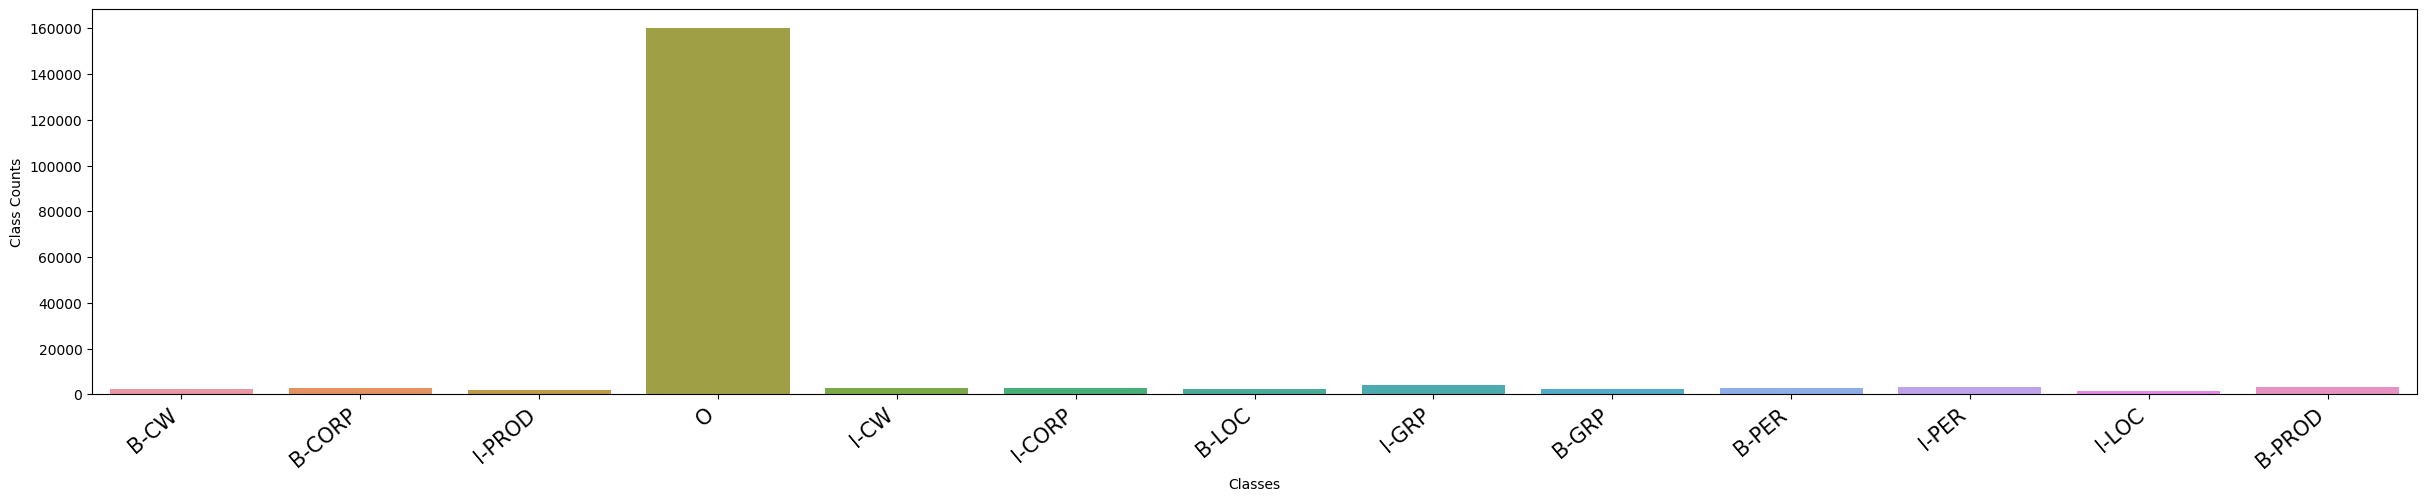

In [18]:
plot_all_labels(train_label_set, train_labels)


{0: 'B-CW', 1: 'B-CORP', 2: 'I-PROD', 3: 'I-CW', 4: 'I-CORP', 5: 'B-LOC', 6: 'I-GRP', 7: 'B-GRP', 8: 'B-PER', 9: 'I-PER', 10: 'I-LOC', 11: 'B-PROD'}
{'B-CW': 0, 'B-CORP': 1, 'I-PROD': 2, 'I-CW': 3, 'I-CORP': 4, 'B-LOC': 5, 'I-GRP': 6, 'B-GRP': 7, 'B-PER': 8, 'I-PER': 9, 'I-LOC': 10, 'B-PROD': 11}


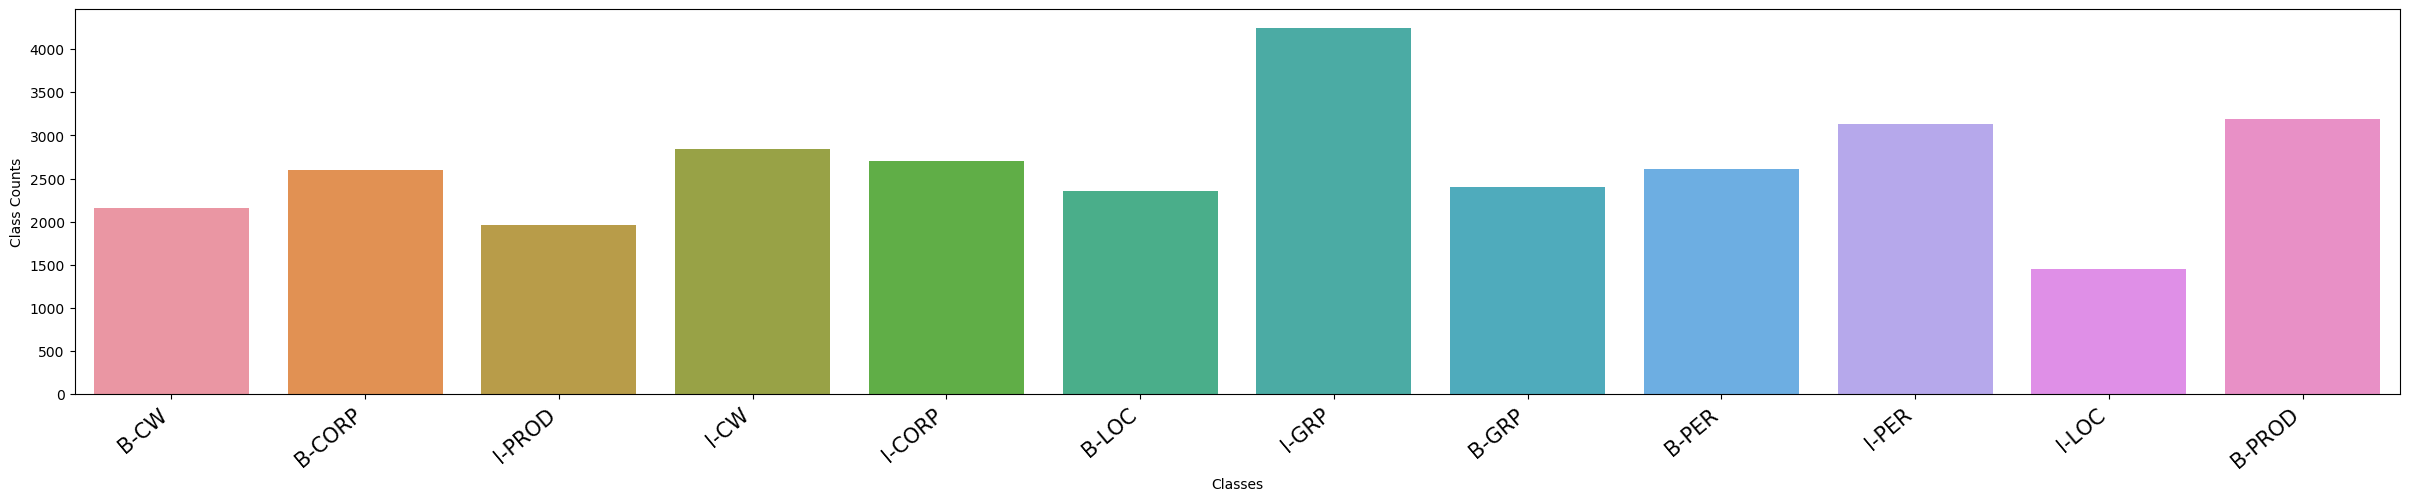

In [19]:
plot_only_ne(train_label_set, train_labels)

{0: 'B-CW', 1: 'I-PROD', 2: 'B-CORP', 3: 'O', 4: 'I-LOC', 5: 'I-CW', 6: 'B-LOC', 7: 'I-GRP', 8: 'B-GRP', 9: 'B-PER', 10: 'I-PER', 11: 'I-CORP', 12: 'B-PROD'}
{'B-CW': 0, 'I-PROD': 1, 'B-CORP': 2, 'O': 3, 'I-LOC': 4, 'I-CW': 5, 'B-LOC': 6, 'I-GRP': 7, 'B-GRP': 8, 'B-PER': 9, 'I-PER': 10, 'I-CORP': 11, 'B-PROD': 12}


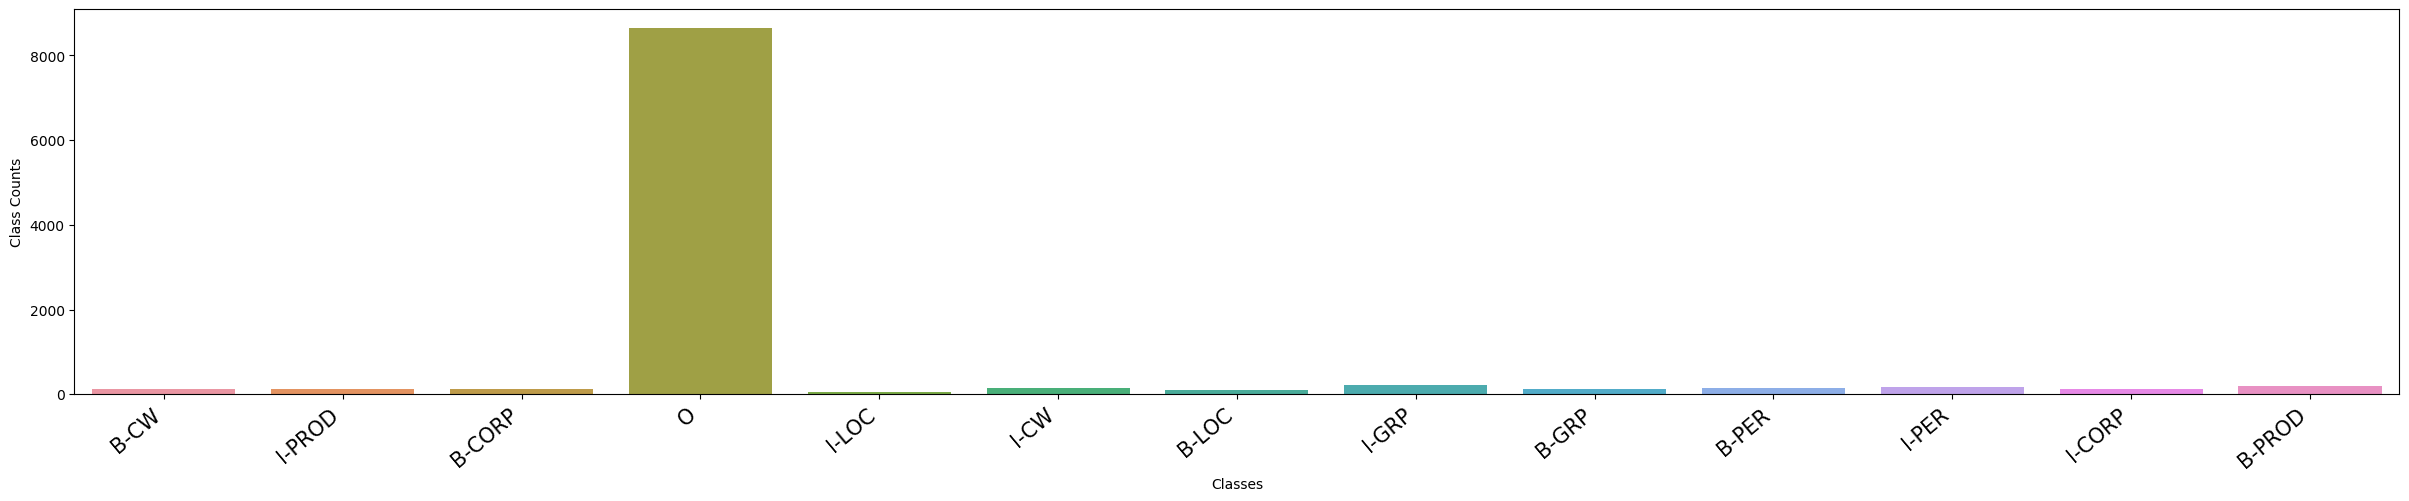

In [20]:
plot_all_labels(dev_label_set, dev_labels)

{0: 'B-CW', 1: 'I-PROD', 2: 'B-CORP', 3: 'I-LOC', 4: 'I-CW', 5: 'B-LOC', 6: 'I-GRP', 7: 'B-GRP', 8: 'B-PER', 9: 'I-PER', 10: 'I-CORP', 11: 'B-PROD'}
{'B-CW': 0, 'I-PROD': 1, 'B-CORP': 2, 'I-LOC': 3, 'I-CW': 4, 'B-LOC': 5, 'I-GRP': 6, 'B-GRP': 7, 'B-PER': 8, 'I-PER': 9, 'I-CORP': 10, 'B-PROD': 11}


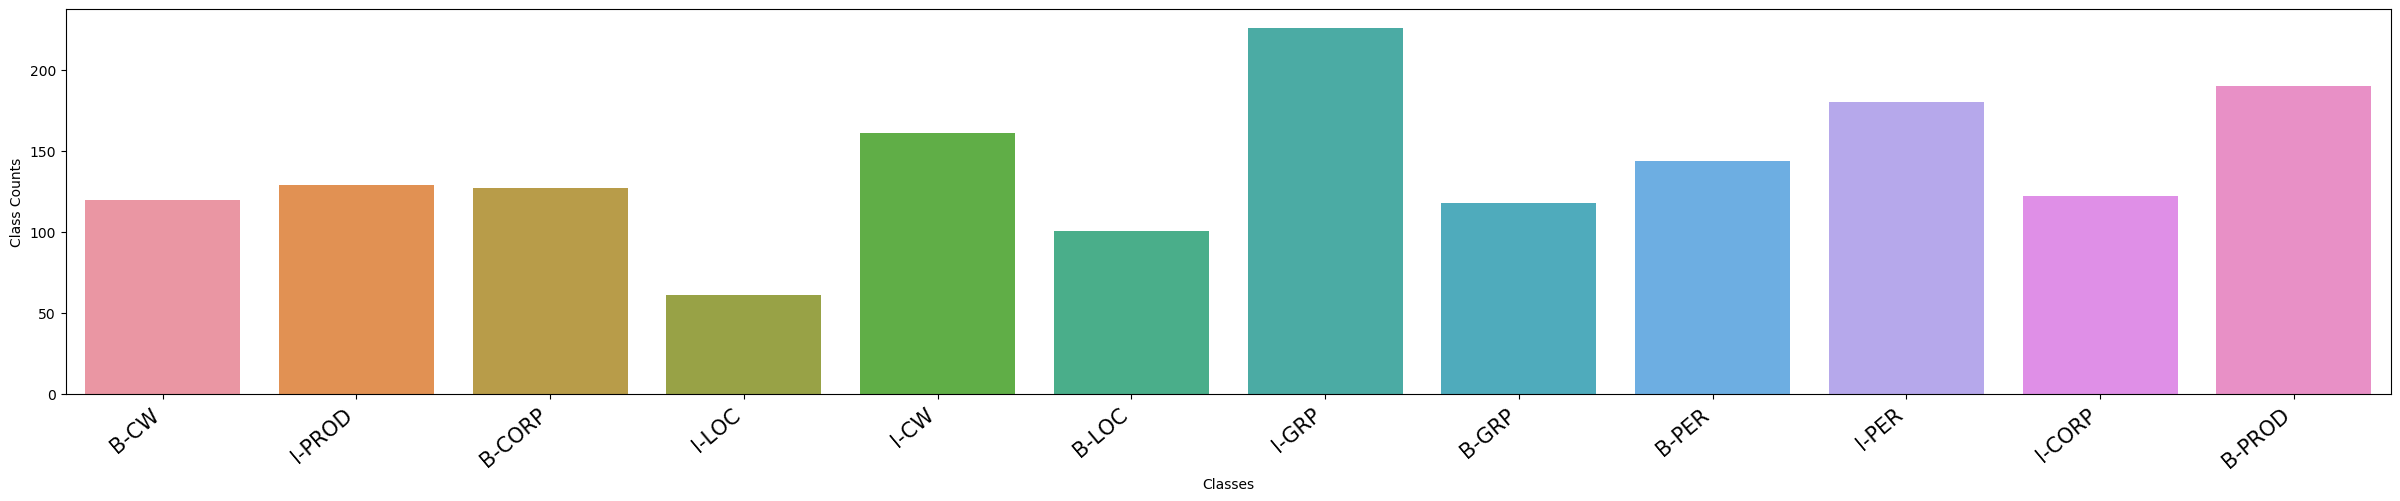

In [21]:
plot_only_ne(dev_label_set, dev_labels)